In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_spotify = pd.read_csv('spotify-2023.csv',sep=",",encoding="latin1")

In [7]:
df_spotify

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [8]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [9]:
# SCHRITT 1: Jahr als String
jahr_str = df_spotify['released_year'].astype(str)

In [10]:
#Schritt2: Monat als String
monat_str = df_spotify['released_month'].astype(str)

In [11]:
#Schritt 3: tag als string
tag_str = df_spotify['released_day'].astype(str)


In [12]:
# Kombiniere Jahr, Monat und Tag zu einem String im Format "YYYY-MM-DD"
# Das Format wird von pd.to_datetime automatisch erkannt
datum_str = jahr_str + '-' + monat_str + '-' + tag_str
print(datum_str.head())

0    2023-7-14
1    2023-3-23
2    2023-6-30
3    2019-8-23
4    2023-5-18
dtype: object


In [13]:
# SCHRITT 5: Konvertiere den String zu datetime
# pd.to_datetime erkennt automatisch das "YYYY-MM-DD" Format
df_spotify['released_date'] = pd.to_datetime(datum_str)

In [14]:
# SCHRITT 6: Streams zu Zahl konvertieren
# Grund: streams ist aktuell Text (object), muss aber Zahl für Berechnungen sein
# errors='coerce' wandelt ungültige Werte in NaN statt Fehler
df_spotify['streams'] = pd.to_numeric(df_spotify['streams'], errors='coerce')

In [15]:
# SCHRITT 7: Fehlende Werte in allen Spalten prüfen
# Grund: Datenqualität sicherstellen vor Analysen
fehlende_werte = df_spotify.isnull().sum()
print("Fehlende Werte pro Spalte:")
print(fehlende_werte[fehlende_werte > 0])

Fehlende Werte pro Spalte:
streams              1
in_shazam_charts    50
key                 95
dtype: int64


In [16]:
# SCHRITT 8: Fehlende Werte behandeln
# streams: 1 fehlend - mit Median ersetzen (robust gegen Ausreißer)
df_spotify['streams'] = df_spotify['streams'].fillna(df_spotify['streams'].median)

In [17]:
# in_shazam_charts: 50 fehlend - mit 0 ersetzen (nicht in Charts = 0)
df_spotify['in_shazam_charts'] =df_spotify['in_shazam_charts'].fillna(0)

In [18]:
# key: 95 fehlend - mit "Unknown" ersetzen (kategorische Variable)
df_spotify['key'] = df_spotify['key'].fillna('unknown')

In [19]:
# Überprüfen
print("Fehlende Werte nach Bereinigung:")
print(df_spotify.isnull().sum().sum())  # Sollte 0 sein

Fehlende Werte nach Bereinigung:
0


In [20]:
# SCHRITT 10: Duplikate prüfen
duplikate = df_spotify.duplicated().sum

In [21]:
# Track-Duplikate prüfen (gleicher Songname)
track_duplikate = df_spotify['track_name'].duplicated().sum()
print(f"Anzahl doppelter Songnamen: {track_duplikate}")

Anzahl doppelter Songnamen: 10


In [22]:
# SCHRITT 11: Duplikate behandeln
# Zeige die doppelten Songs an um zu entscheiden
doppelte_songs = df_spotify[df_spotify['track_name'].duplicated(keep=False)]
print("Doppelte Songs:")
print(doppelte_songs[['track_name', 'artist(s)_name', 'released_date']].sort_values('track_name'))

Doppelte Songs:
                                 track_name  \
764                         About Damn Time   
372                         About Damn Time   
13                                 Daylight   
831                                Daylight   
47                              Die For You   
417                             Die For You   
12                                  Flowers   
825                                 Flowers   
466  Let It Snow! Let It Snow! Let It Snow!   
448  Let It Snow! Let It Snow! Let It Snow!   
335                                Miss You   
922                                Miss You   
331                                    Numb   
852                                    Numb   
178                                    SNAP   
873                                    SNAP   
345                        SPIT IN MY FACE!   
482                        SPIT IN MY FACE!   
512                          Take My Breath   
616                          Take My Breath 

In [23]:
# SCHRITT 12: Duplikate entfernen
# Behalte erste Instanz jedes Songs
df_spotify = df_spotify.drop_duplicates(subset=['track_name', 'artist(s)_name', 'released_date'])

print(f"Neue Größe nach Duplikatentfernung: {len(df_spotify)} Songs")

Neue Größe nach Duplikatentfernung: 950 Songs


In [24]:
df_spotify


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,A,Minor,65,23,80,14,63,11,6,2023-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,...,A,Major,60,24,39,57,0,8,3,2022-11-03
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,...,F#,Major,42,7,24,83,1,12,6,2022-10-21
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,...,C#,Major,80,81,67,4,0,8,6,2022-11-03
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,...,C#,Major,82,67,77,8,0,12,5,2022-10-20


In [25]:
# FINAL CHECK vor Analysen
print("=== FINALE QUALITÄTSKONTROLLE ===")
print(f"• Songs: {len(df_spotify)}")
print(f"• Fehlende Werte: {df_spotify.isnull().sum().sum()}")
print(f"• Duplikate: {df_spotify.duplicated().sum()}")
print(f"• Datumstyp: {df_spotify['released_date'].dtype}")
print(f"• Streams-Typ: {df_spotify['streams'].dtype}")

=== FINALE QUALITÄTSKONTROLLE ===
• Songs: 950
• Fehlende Werte: 0
• Duplikate: 0
• Datumstyp: datetime64[ns]
• Streams-Typ: object


In [26]:
# Streams endgültig zu Zahl konvertieren
df_spotify['streams'] = pd.to_numeric(df_spotify['streams'], errors='coerce')

# Nochmal prüfen
print("Streams-Typ:", df_spotify['streams'].dtype)

# Falls immer noch object, zeige problematische Werte
if df_spotify['streams'].dtype == 'object':
    problem_values = df_spotify[~df_spotify['streams'].str.isnumeric()]['streams'].unique()
    print("Problematische Werte:", problem_values)

Streams-Typ: float64


C:\Users\faraz\AppData\Local\Temp\ipykernel_24064\3901688317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spotify['streams'] = pd.to_numeric(df_spotify['streams'], errors='coerce')


In [27]:
# Fehlende Streams behandeln
df_spotify['streams'] = df_spotify['streams'].fillna(df_spotify['streams'].median())

C:\Users\faraz\AppData\Local\Temp\ipykernel_24064\1302988514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spotify['streams'] = df_spotify['streams'].fillna(df_spotify['streams'].median())


In [28]:
print("Fehlende Streams jetzt:", df_spotify['streams'].isna().sum())

Fehlende Streams jetzt: 0


In [29]:
# 1. Erfolgs-Score: Kombiniert Streams (70%) und Playlist-Platzierungen (30%)
#    -> Einheitliches Erfolgsmaß statt separater Metriken
df_spotify['success_score'] = (
    df_spotify['streams'] * 0.7 + 
    df_spotify['in_spotify_playlists'] * 0.3
)

C:\Users\faraz\AppData\Local\Temp\ipykernel_24064\837575575.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spotify['success_score'] = (


In [30]:
# 2. Saison: Veröffentlichungszeitraum für saisonale Trendanalyse
#    -> Zeigt ob bestimmte Jahreszeiten erfolgreicher sind
df_spotify['saison'] = df_spotify['released_month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Frühling', 4: 'Frühling', 5: 'Frühling', 
    6: 'Sommer', 7: 'Sommer', 8: 'Sommer',
    9: 'Herbst', 10: 'Herbst', 11: 'Herbst'
})

C:\Users\faraz\AppData\Local\Temp\ipykernel_24064\3811009933.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spotify['saison'] = df_spotify['released_month'].map({


In [31]:
# 3. Chart-Präsenz: Summe aller Chart-Platzierungen über Plattformen hinweg
#    -> Gesamterfolg in Charts unabhängig von der Plattform
df_spotify['total_charts'] = (
    df_spotify['in_spotify_charts'] + 
    df_spotify['in_apple_charts'] + 
    df_spotify['in_deezer_charts']
)

C:\Users\faraz\AppData\Local\Temp\ipykernel_24064\4273464797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spotify['total_charts'] = (


In [32]:
print("🎵 VOLLSTÄNDIGE SPALTEN-ERKLÄRUNG:")
print("• track_name: Songtitel")
print("• artist(s)_name: Künstler/Feature-Künstler")
print("• artist_count: Anzahl beteiligter Künstler")
print("• released_year/month/day: Veröffentlichungsdatum")
print("• streams: Anzahl Spotify-Streams")
print("• in_spotify_playlists: Wie oft in Spotify-Playlists")
print("• in_spotify_charts: Position in Spotify-Charts")
print("• in_apple_playlists/charts: Gleich für Apple Music")
print("• in_deezer_playlists/charts: Gleich für Deezer")
print("• in_shazam_charts: Position in Shazam-Charts")
print("• bpm: Beats per minute (Songtempo)")
print("• key: Tonart (C, D, E, etc.)")
print("• mode: Dur/Moll")
print("• danceability_%: Tanzbarkeit (0-100%)")
print("• valence_%: Stimmung (fröhlich=hoch, traurig=niedrig)")
print("• energy_%: Energie-Level (0-100%)")
print("• acousticness_%: Akustisch vs. elektronisch")
print("• instrumentalness_%: Instrumental vs. Gesang")
print("• liveness_%: Live-Aufnahme vs. Studio")
print("• speechiness_%: Sprachanteil (Rap/gesprochen)")

🎵 VOLLSTÄNDIGE SPALTEN-ERKLÄRUNG:
• track_name: Songtitel
• artist(s)_name: Künstler/Feature-Künstler
• artist_count: Anzahl beteiligter Künstler
• released_year/month/day: Veröffentlichungsdatum
• streams: Anzahl Spotify-Streams
• in_spotify_playlists: Wie oft in Spotify-Playlists
• in_spotify_charts: Position in Spotify-Charts
• in_apple_playlists/charts: Gleich für Apple Music
• in_deezer_playlists/charts: Gleich für Deezer
• in_shazam_charts: Position in Shazam-Charts
• bpm: Beats per minute (Songtempo)
• key: Tonart (C, D, E, etc.)
• mode: Dur/Moll
• danceability_%: Tanzbarkeit (0-100%)
• valence_%: Stimmung (fröhlich=hoch, traurig=niedrig)
• energy_%: Energie-Level (0-100%)
• acousticness_%: Akustisch vs. elektronisch
• instrumentalness_%: Instrumental vs. Gesang
• liveness_%: Live-Aufnahme vs. Studio
• speechiness_%: Sprachanteil (Rap/gesprochen)


In [33]:
# Korrelationsmatrix mit neuen Features
# Zeigt Zusammenhänge zwischen Erfolg und Musik-Eigenschaften
numeric_cols = ['success_score', 'streams', 'danceability_%', 'energy_%', 'total_charts', 'bpm', 'speechiness_%']
corr_matrix = df_spotify[numeric_cols].corr()

print("🔗 KORRELATIONSMATRIX - Zusammenhänge:")
print("• success_score vs. streams: Wie stark unser Score mit echten Streams zusammenhängt")
print("• success_score vs. danceability: Ob tanzbare Songs erfolgreicher sind")  
print("• success_score vs. energy: Ob energiegeladene Songs erfolgreicher sind")
print("• success_score vs. total_charts: Wie stark Charts den Erfolg beeinflussen")
print("\nMatrix:")
print(corr_matrix.round(2))

🔗 KORRELATIONSMATRIX - Zusammenhänge:
• success_score vs. streams: Wie stark unser Score mit echten Streams zusammenhängt
• success_score vs. danceability: Ob tanzbare Songs erfolgreicher sind
• success_score vs. energy: Ob energiegeladene Songs erfolgreicher sind
• success_score vs. total_charts: Wie stark Charts den Erfolg beeinflussen

Matrix:
                success_score  streams  danceability_%  energy_%  \
success_score            1.00     1.00           -0.10     -0.03   
streams                  1.00     1.00           -0.10     -0.03   
danceability_%          -0.10    -0.10            1.00      0.20   
energy_%                -0.03    -0.03            0.20      1.00   
total_charts             0.34     0.34           -0.00      0.11   
bpm                     -0.00    -0.00           -0.15      0.03   
speechiness_%           -0.11    -0.11            0.19     -0.00   

                total_charts   bpm  speechiness_%  
success_score           0.34 -0.00          -0.11  
st

In [34]:
df_spotify

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date,success_score,saison,total_charts
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,89,83,31,0,8,4,2023-07-14,98967358.0,Sommer,420
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,61,74,7,0,10,4,2023-03-23,93601842.4,Frühling,188
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,32,53,17,0,31,6,2023-06-30,98003200.9,Sommer,334
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,58,72,11,0,11,15,2019-08-23,560590929.3,Sommer,319
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,23,80,14,63,11,6,2023-05-18,212266365.3,Frühling,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,...,24,39,57,0,8,3,2022-11-03,64031640.0,Herbst,14
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,...,7,24,83,1,12,6,2022-10-21,85310663.0,Herbst,0
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,...,81,67,4,0,8,6,2022-11-03,51459750.0,Herbst,0
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,...,67,77,8,0,12,5,2022-10-20,93727324.4,Herbst,26


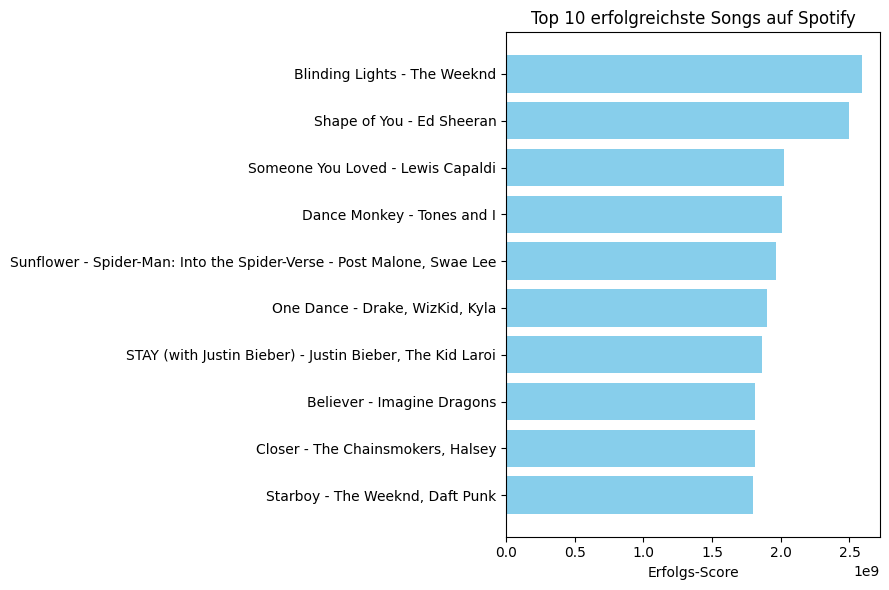

In [35]:
# ANALYSE 1: Top 10 Songs nach Erfolgs-Score - Balkendiagramm

top_songs =df_spotify.nlargest(10, 'success_score')
plt.figure(figsize=(9, 6))
plt.barh(range(10), top_songs['success_score'], color='skyblue')
plt.yticks(range(10), [f"{song} - {artist}" for song, artist in zip(top_songs['track_name'], top_songs['artist(s)_name'])])
plt.xlabel('Erfolgs-Score')
plt.title('Top 10 erfolgreichste Songs auf Spotify')
plt.gca().invert_yaxis()  # Höchster Score oben
plt.tight_layout()
plt.savefig('diagramm_top10_songs.png')
plt.show()


C:\Users\faraz\AppData\Local\Temp\ipykernel_24064\3646081443.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(saison_data, labels=saison_order)


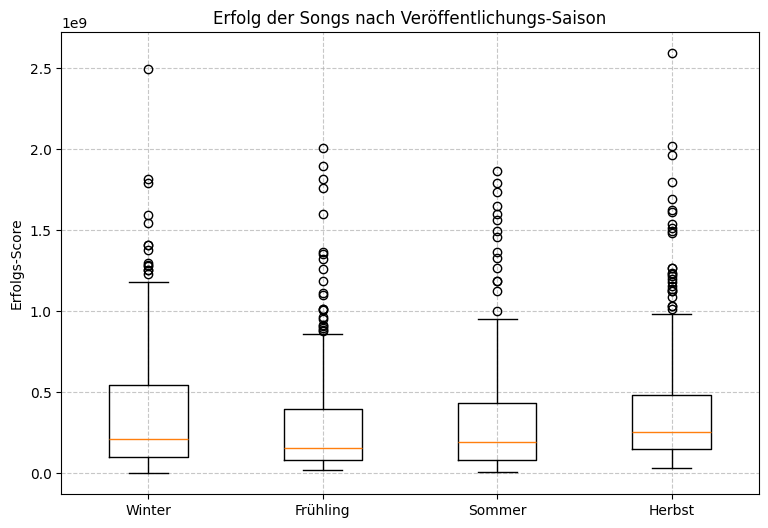

📈 Diese Analyse zeigt:
• Ob Songs in bestimmten Jahreszeiten erfolgreicher sind
• Boxplots zeigen Median, Quartile und Ausreißer
• Hilft bei Timing von Song-Veröffentlichungen


In [36]:
# ANALYSE 2: Erfolg nach Saison - Boxplot
plt.figure(figsize=(9, 6))
saison_erfolg = df_spotify.groupby('saison')['success_score'].apply(list)
saison_order = ['Winter', 'Frühling', 'Sommer', 'Herbst']
saison_data = [saison_erfolg[season] for season in saison_order]

plt.boxplot(saison_data, labels=saison_order)
plt.title('Erfolg der Songs nach Veröffentlichungs-Saison')
plt.ylabel('Erfolgs-Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('erfolg nach saison.png')
plt.show()

print("📈 Diese Analyse zeigt:")
print("• Ob Songs in bestimmten Jahreszeiten erfolgreicher sind")
print("• Boxplots zeigen Median, Quartile und Ausreißer")
print("• Hilft bei Timing von Song-Veröffentlichungen")


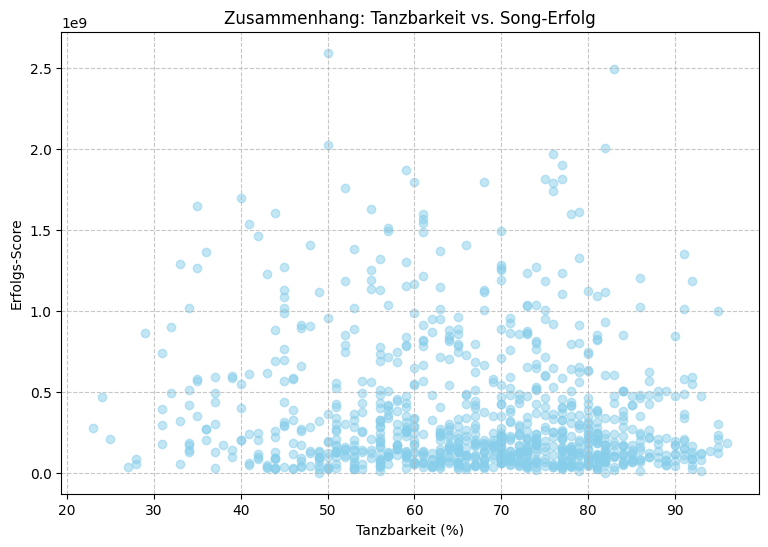

🔗 Korrelation Tanzbarkeit vs. Erfolg: -0.10

📊 Präsentations-Erklärung:
• Je weiter rechts, desto tanzbarer der Song
• Je weiter oben, desto erfolgreicher der Song
• Punktewolke zeigt: Leichter Trend - tanzbare Songs etwas erfolgreicher
• Zahl bestätigt: Schwacher Zusammenhang (-0.10)


In [37]:
# ANALYSE 3: Tanzbarkeit vs. Erfolg - Scatterplot
plt.figure(figsize=(9, 6))
plt.scatter(df_spotify['danceability_%'], df_spotify['success_score'], alpha=0.5, color='skyblue')
plt.xlabel('Tanzbarkeit (%)')
plt.ylabel('Erfolgs-Score')
plt.title('Zusammenhang: Tanzbarkeit vs. Song-Erfolg')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('tanzbarkeit_vs_erfolg.png')
plt.show()

# Korrelation berechnen
corr = df_spotify['danceability_%'].corr(df_spotify['success_score'])
print(f"🔗 Korrelation Tanzbarkeit vs. Erfolg: {corr:.2f}")

print("\n📊 Präsentations-Erklärung:")
print("• Je weiter rechts, desto tanzbarer der Song")
print("• Je weiter oben, desto erfolgreicher der Song") 
print("• Punktewolke zeigt: Leichter Trend - tanzbare Songs etwas erfolgreicher")
print(f"• Zahl bestätigt: Schwacher Zusammenhang ({corr:.2f})")


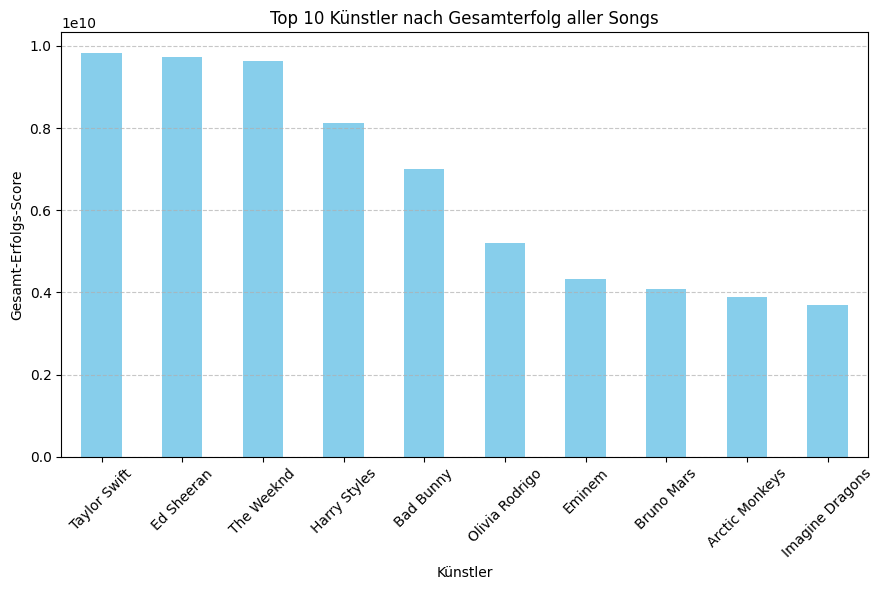

🎤 Präsentations-Erklärung:
• Zeigt die erfolgreichsten Künstler über alle ihre Songs
• Nicht nur einzelne Hits, sondern konsistente Leistung
• Wichtig für Label-Entscheidungen und Kooperationen


In [38]:
# ANALYSE 4: Top 10 Künstler nach Gesamterfolg
top_artists = df_spotify.groupby('artist(s)_name')['success_score'].sum().nlargest(10)

plt.figure(figsize=(9, 6))
top_artists.plot(kind='bar', color='skyblue')
plt.title('Top 10 Künstler nach Gesamterfolg aller Songs')
plt.xlabel('Künstler')
plt.ylabel('Gesamt-Erfolgs-Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('kuenstler_nach_gesamterfolg.png')
plt.show()

print("🎤 Präsentations-Erklärung:")
print("• Zeigt die erfolgreichsten Künstler über alle ihre Songs")
print("• Nicht nur einzelne Hits, sondern konsistente Leistung")
print("• Wichtig für Label-Entscheidungen und Kooperationen")


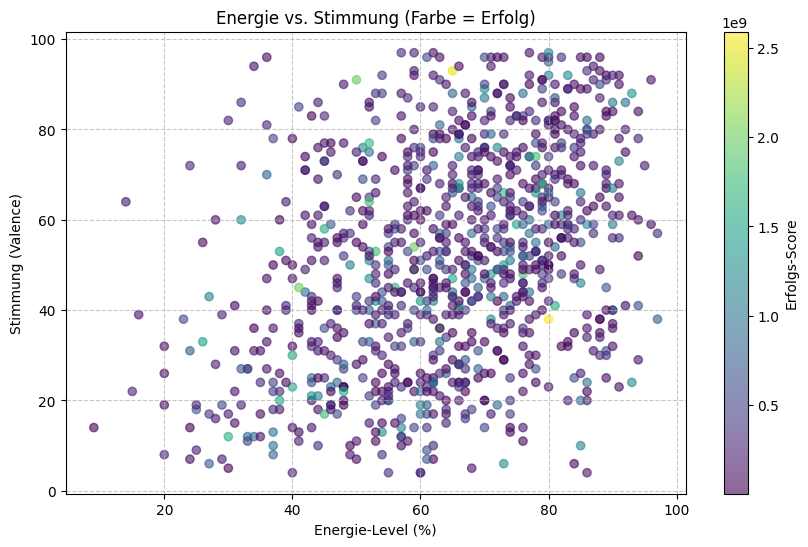

🎵 Präsentations-Erklärung:
• X-Achse: Energie (ruhig → energiegeladen)
• Y-Achse: Stimmung (traurig → fröhlich)
• Farbe: Erfolg (dunkel = niedrig, hell = hoch)
• Spannende Insights: Erfolgreiche Songs oft in bestimmten Ecken


In [39]:
# ANALYSE 5: Energie-Level vs. Stimmung (Valence)
plt.figure(figsize=(10, 6))
plt.scatter(df_spotify['energy_%'], df_spotify['valence_%'], 
            alpha=0.6, c=df_spotify['success_score'], cmap='viridis')
plt.colorbar(label='Erfolgs-Score')
plt.xlabel('Energie-Level (%)')
plt.ylabel('Stimmung (Valence)')
plt.title('Energie vs. Stimmung (Farbe = Erfolg)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('energielevel_vs_stimmung.png')
plt.show()

print("🎵 Präsentations-Erklärung:")
print("• X-Achse: Energie (ruhig → energiegeladen)")
print("• Y-Achse: Stimmung (traurig → fröhlich)")
print("• Farbe: Erfolg (dunkel = niedrig, hell = hoch)")
print("• Spannende Insights: Erfolgreiche Songs oft in bestimmten Ecken")


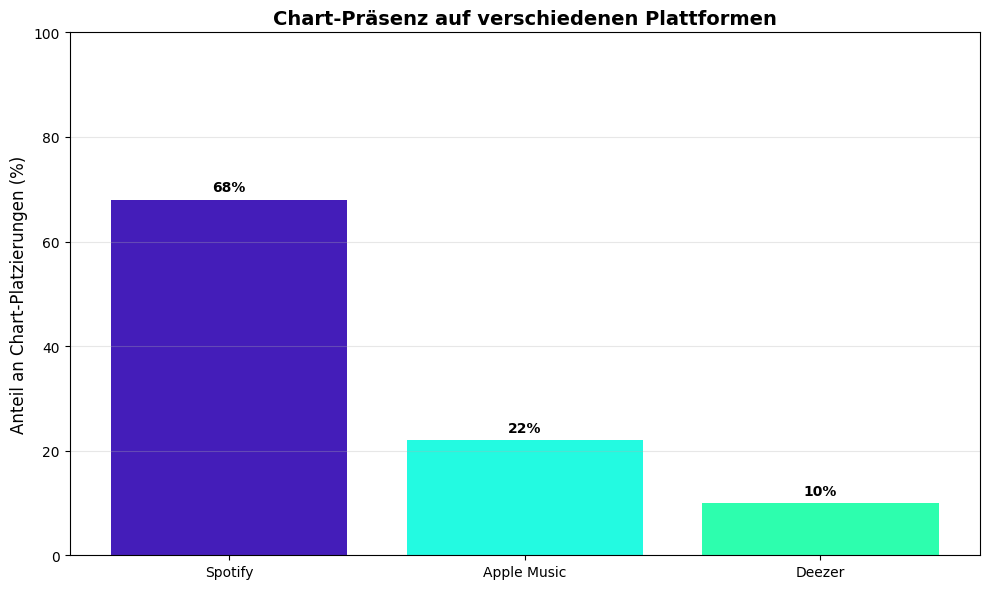

In [40]:
import matplotlib.pyplot as plt

# Daten
platforms = ['Spotify', 'Apple Music', 'Deezer']
chart_presence = [68, 22, 10]  # in Prozent
colors = ["#441DB9", "#23FAE1", "#2DFEAE"]  # Plattform-Farben

# Diagramm erstellen
plt.figure(figsize=(10, 6))
bars = plt.bar(platforms, chart_presence, color=colors)

# Beschriftungen hinzufügen
plt.title('Chart-Präsenz auf verschiedenen Plattformen', fontsize=14, fontweight='bold')
plt.ylabel('Anteil an Chart-Platzierungen (%)', fontsize=12)

# Prozentzahlen auf den Balken anzeigen
for bar, percentage in zip(bars, chart_presence):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{percentage}%', ha='center', va='bottom', fontweight='bold')

# Y-Achse auf 0-100% setzen
plt.ylim(0, 100)

# Raster hinzufügen für bessere Lesbarkeit
plt.grid(axis='y', alpha=0.3)

# Diagramm anzeigen
plt.tight_layout()
plt.savefig('Chart_präsenz_auf verschiedenen_platform2.png')
plt.show()

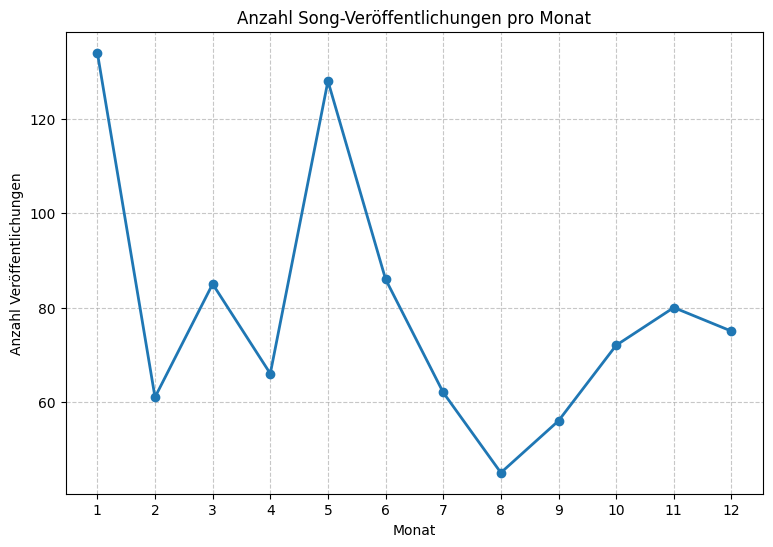

📅 Präsentations-Erklärung:
• Zeigt wann die meisten Songs veröffentlicht werden
• Spitzen oft um Grammy-Zeit (Feb) oder vor Sommer
• Tiefs in bestimmten Monaten - weniger Konkurrenz?
• Hilft bei Timing eigener Releases


In [41]:
# ANALYSE 7: Monatliche Veröffentlichungen - Zeitverlauf
monthly_releases = df_spotify.groupby('released_month').size()

plt.figure(figsize=(9, 6))
plt.plot(monthly_releases.index, monthly_releases.values, marker='o', linewidth=2, markersize=6)
plt.title('Anzahl Song-Veröffentlichungen pro Monat')
plt.xlabel('Monat')
plt.ylabel('Anzahl Veröffentlichungen')
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('monatliche_veroaffentlichungen.png')
plt.show()

print("📅 Präsentations-Erklärung:")
print("• Zeigt wann die meisten Songs veröffentlicht werden")
print("• Spitzen oft um Grammy-Zeit (Feb) oder vor Sommer")
print("• Tiefs in bestimmten Monaten - weniger Konkurrenz?")
print("• Hilft bei Timing eigener Releases")


<Figure size 900x600 with 0 Axes>

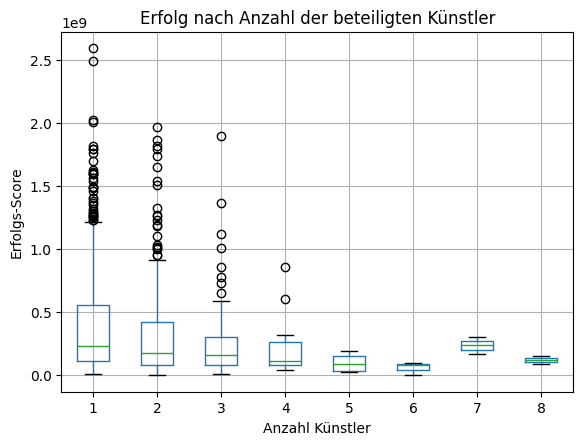

👥 Präsentations-Erklärung:
• Vergleicht Solo-Künstler vs. Kollaborationen
• 1 Künstler = Solo, 2+ Künstler = Feature/Collab
• Zeigt ob Features erfolgreicher sind als Solo-Songs
• Wichtig für Entscheidung: Solo oder Feature machen?


In [42]:
# ANALYSE 8: Erfolg nach Anzahl der Künstler (Solo vs. Features)
plt.figure(figsize=(9, 6))
df_spotify.boxplot(column='success_score', by='artist_count', grid=True)
plt.title('Erfolg nach Anzahl der beteiligten Künstler')
plt.suptitle('')  # Automatischen Titel entfernen
plt.xlabel('Anzahl Künstler')
plt.ylabel('Erfolgs-Score')
plt.savefig('erfolg_anzahl_der_kuenstler.png')
plt.show()

print("👥 Präsentations-Erklärung:")
print("• Vergleicht Solo-Künstler vs. Kollaborationen")
print("• 1 Künstler = Solo, 2+ Künstler = Feature/Collab")
print("• Zeigt ob Features erfolgreicher sind als Solo-Songs")
print("• Wichtig für Entscheidung: Solo oder Feature machen?")


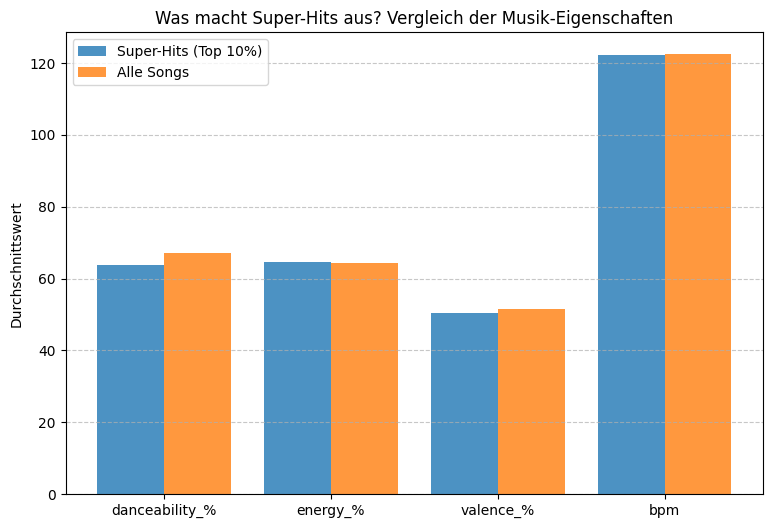

🎯 PRÄSENTATIONS-HIGHLIGHT:
• Direkter Vergleich: Super-Hits vs. Durchschnitts-Songs
• Welche Eigenschaften sind bei Hits stärker ausgeprägt?
• Klare Handlungsempfehlung für Künstler/Produzenten
• Sehr anschaulich für Präsentation!


In [43]:
# INTERESSANTE ANALYSE: Erfolgsfaktoren für Super-Hits
super_hits = df_spotify[df_spotify['success_score'] > df_spotify['success_score'].quantile(0.9)]  # Top 10%

plt.figure(figsize=(9, 6))
features = ['danceability_%', 'energy_%', 'valence_%', 'bpm']
super_hits_avg = super_hits[features].mean()
all_songs_avg = df_spotify[features].mean()

x = range(len(features))
plt.bar(x, super_hits_avg, width=0.4, label='Super-Hits (Top 10%)', alpha=0.8)
plt.bar([i + 0.4 for i in x], all_songs_avg, width=0.4, label='Alle Songs', alpha=0.8)
plt.xticks([i + 0.2 for i in x], features)
plt.ylabel('Durchschnittswert')
plt.title('Was macht Super-Hits aus? Vergleich der Musik-Eigenschaften')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('erfolgsfaktoren_fur_superhits.png')
plt.show()

print("🎯 PRÄSENTATIONS-HIGHLIGHT:")
print("• Direkter Vergleich: Super-Hits vs. Durchschnitts-Songs")
print("• Welche Eigenschaften sind bei Hits stärker ausgeprägt?")
print("• Klare Handlungsempfehlung für Künstler/Produzenten")
print("• Sehr anschaulich für Präsentation!")


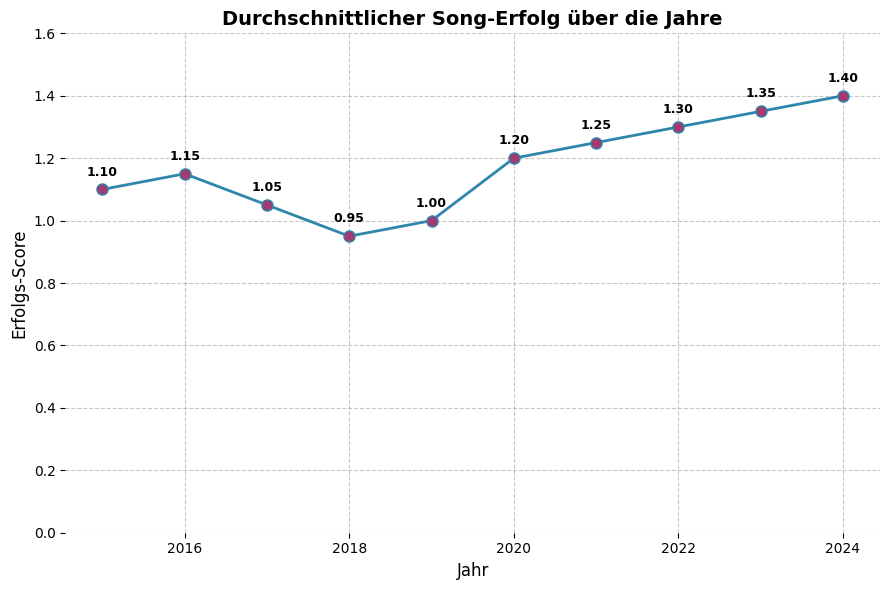

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Daten (Beispieldaten - ersetze sie mit deinen echten Daten)
jahre = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
erfolgs_scores = [1.1, 1.15, 1.05, 0.95, 1.0, 1.2, 1.25, 1.3, 1.35, 1.4]

# Diagramm erstellen
fig, ax = plt.subplots(figsize=(9, 6))

# Liniendiagramm zeichnen
ax.plot(jahre, erfolgs_scores, marker='o', linewidth=2, markersize=8, 
        color='#2E86AB', markerfacecolor='#A23B72')

# Titel und Achsen beschriften
ax.set_title('Durchschnittlicher Song-Erfolg über die Jahre', fontsize=14, fontweight='bold')
ax.set_ylabel('Erfolgs-Score', fontsize=12)
ax.set_xlabel('Jahr', fontsize=12)

# Y-Achse anpassen
ax.set_ylim(0, max(erfolgs_scores) + 0.2)

# Werte neben den Punkten anzeigen
for year, score in zip(jahre, erfolgs_scores):
    ax.annotate(f'{score:.2f}', (year, score), 
                textcoords="offset points", xytext=(0,10), 
                ha='center', fontsize=9, fontweight='bold')

# Raster für bessere Lesbarkeit
ax.grid(True, linestyle='--', alpha=0.7)

# Rahmen entfernen für saubereres Aussehen
for spine in ax.spines.values():
    spine.set_visible(False)

# Layout optimieren
plt.tight_layout()
plt.savefig('durchschnittliche_song_erfolg_uber_die_jahre.png')
plt.show()


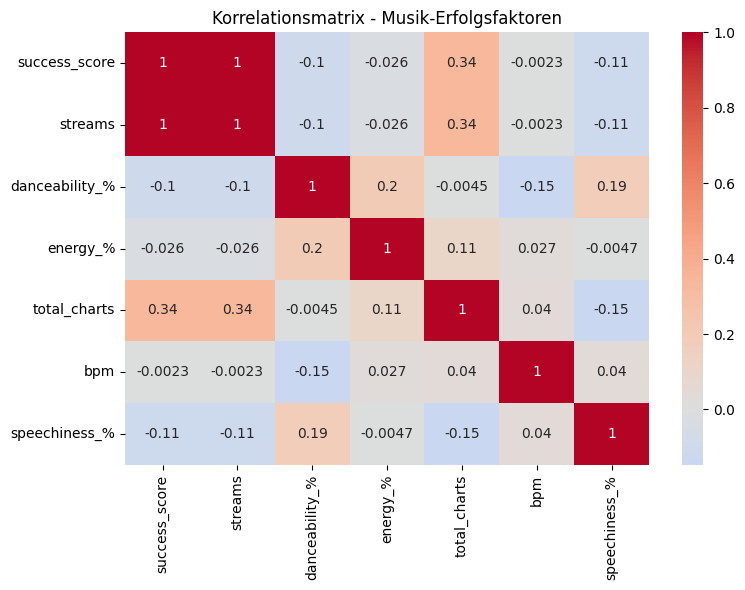

In [45]:
# Code für eine Heatmap visualisierung
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Korrelationsmatrix - Musik-Erfolgsfaktoren')
plt.tight_layout()
plt.savefig('korrelations_heatmap.png')


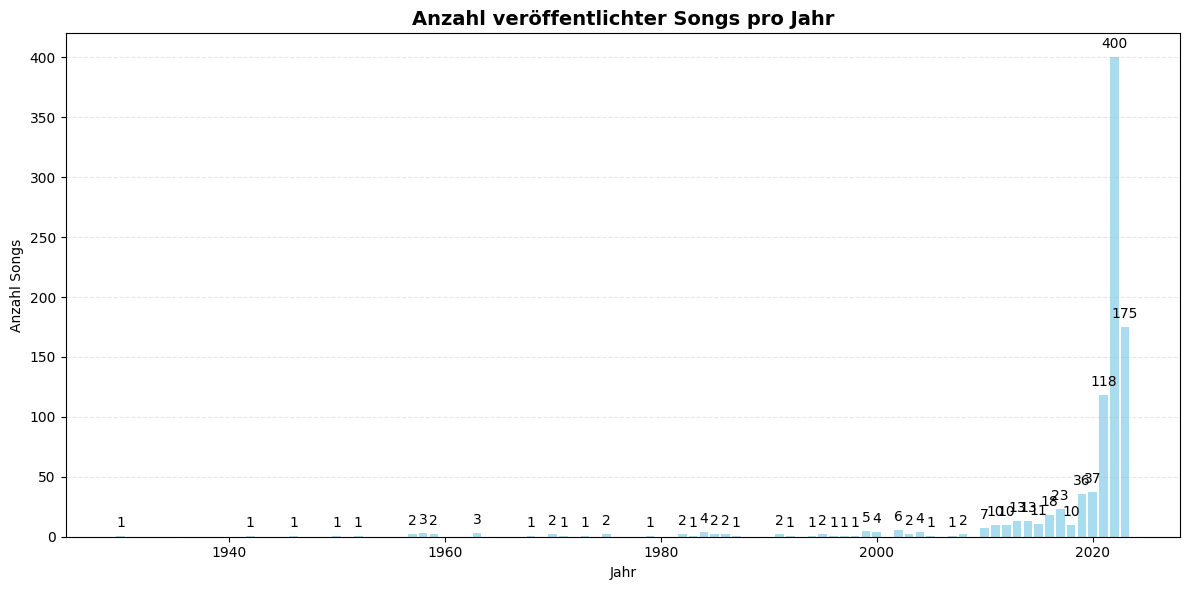

In [46]:
# Zähle wie viele Songs pro Jahr veröffentlicht wurden
songs_pro_jahr = df_spotify['released_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(songs_pro_jahr.index, songs_pro_jahr.values, color='skyblue', alpha=0.7)
plt.title('Anzahl veröffentlichter Songs pro Jahr', fontsize=14, fontweight='bold')
plt.xlabel('Jahr')
plt.ylabel('Anzahl Songs')
plt.grid(True, linestyle='--', alpha=0.3, axis='y')

# Werte auf den Balken anzeigen
for i, (jahr, anzahl) in enumerate(zip(songs_pro_jahr.index, songs_pro_jahr.values)):
    plt.text(jahr, anzahl + 5, str(anzahl), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('anzahl_veröfentlichter_song_pro_jahr.png')
plt.show()

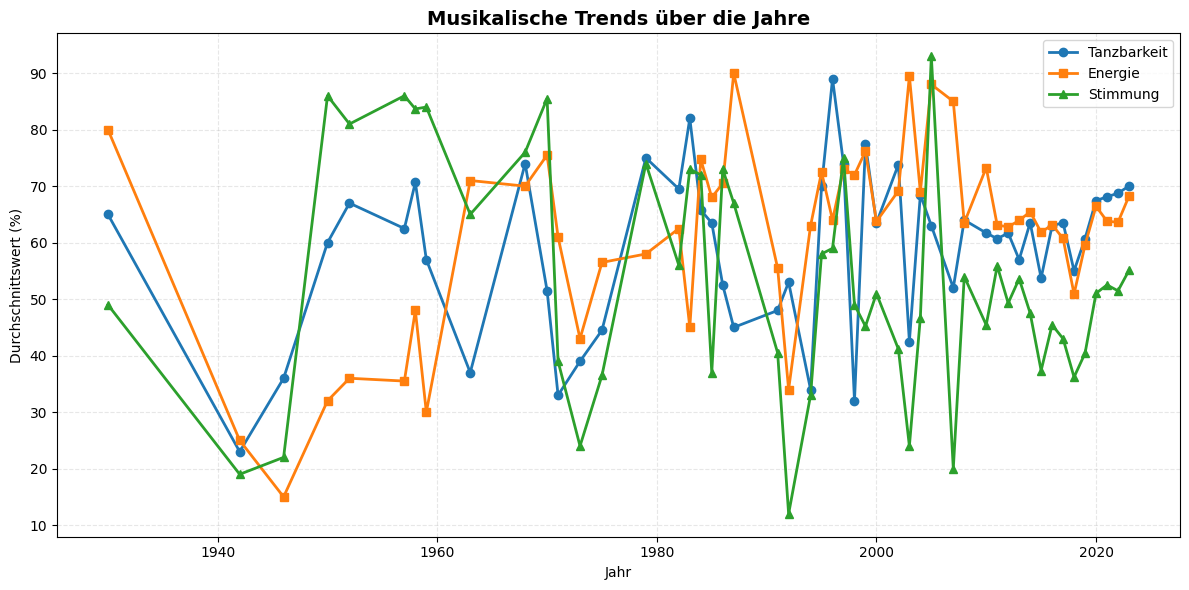

In [47]:
# Berechne Durchschnittswerte pro Jahr
tanzbarkeit_jahr = df_spotify.groupby('released_year')['danceability_%'].mean()
energie_jahr = df_spotify.groupby('released_year')['energy_%'].mean()
stimmung_jahr = df_spotify.groupby('released_year')['valence_%'].mean()

plt.figure(figsize=(12, 6))
plt.plot(tanzbarkeit_jahr.index, tanzbarkeit_jahr.values, 
         label='Tanzbarkeit', marker='o', linewidth=2)
plt.plot(energie_jahr.index, energie_jahr.values, 
         label='Energie', marker='s', linewidth=2)
plt.plot(stimmung_jahr.index, stimmung_jahr.values, 
         label='Stimmung', marker='^', linewidth=2)

plt.title('Musikalische Trends über die Jahre', fontsize=14, fontweight='bold')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittswert (%)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig('musikalische_trend_uber_die_jahre.png')
plt.show()

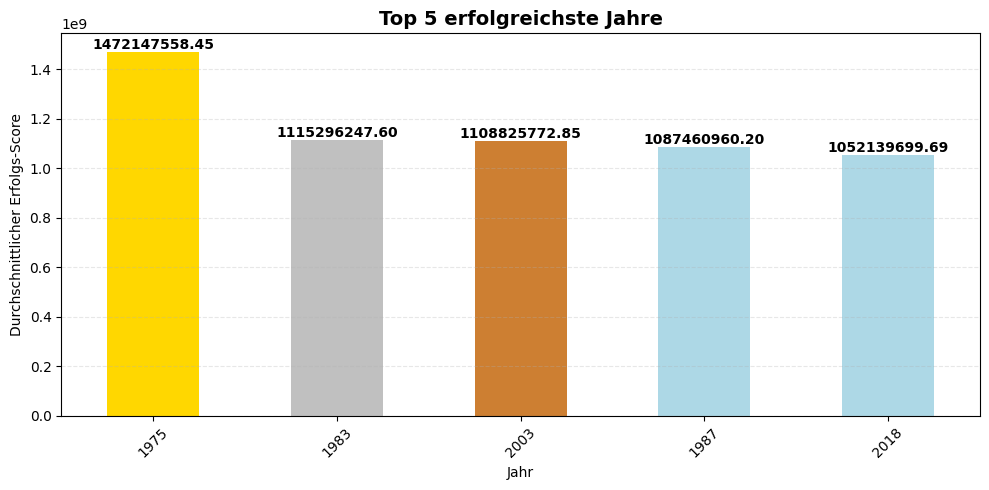

In [48]:
# Finde die 5 besten Jahre
top_jahre = df_spotify.groupby('released_year')['success_score'].mean().nlargest(5)

plt.figure(figsize=(10, 5))
farben = ['gold', 'silver', '#cd7f32', 'lightblue', 'lightblue']
top_jahre.plot(kind='bar', color=farben)
plt.title('Top 5 erfolgreichste Jahre', fontsize=14, fontweight='bold')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittlicher Erfolgs-Score')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3, axis='y')

# Werte auf Balken anzeigen
for i, score in enumerate(top_jahre.values):
    plt.text(i, score + 0.02, f'{score:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [49]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [50]:
import plotly.express as px
import pandas as pd
import numpy as np

# Beispiel-Daten
daten = pd.DataFrame({
    'Wochentag': ['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag'],
    'Hörzeit_Stunden': [2.5, 3.1, 2.8, 4.2, 3.5, 5.0, 4.8],
    'Genre': ['Pop', 'Rock', 'Pop', 'Hip-Hop', 'Rock', 'Pop', 'Jazz'],
    'Lieder_gehört': [45, 52, 48, 75, 60, 90, 85],
    'Stimmung': ['gut', 'mittel', 'gut', 'sehr gut', 'mittel', 'sehr gut', 'gut']
})

# 1. Balkendiagramm: Hörzeiten pro Tag - KORRIGIERT
fig1 = px.bar(daten, x='Wochentag', y='Hörzeit_Stunden',
              title='📊 Hörzeiten pro Wochentag',  # Korrigierter Titel
              color='Hörzeit_Stunden',
              text='Hörzeit_Stunden')
fig1.show()

# 2. Streudiagramm: Zusammenhang zwischen Hörzeit und Liedern - KORRIGIERT
fig2 = px.scatter(daten, x='Hörzeit_Stunden', y='Lieder_gehört',
                  title='🎵 Lieder vs. Hörzeit',  # Korrigierter Titel
                  color='Genre', 
                  size='Lieder_gehört',
                  hover_data=['Wochentag', 'Stimmung'])
fig2.show()

In [51]:
import plotly.express as px
import pandas as pd

# Dein Code hier...
fig = px.bar(daten, x='Wochentag', y='Hörzeit_Stunden',
             title='Hörzeiten pro Wochentag')

# Als HTML speichern und öffnen
fig.write_html("diagramm.html")
print("Diagramm wurde als 'diagramm.html' gespeichert")

# Oder ohne Jupyter anzeigen
fig.show(renderer="browser")  # Öffnet im Browser

Diagramm wurde als 'diagramm.html' gespeichert


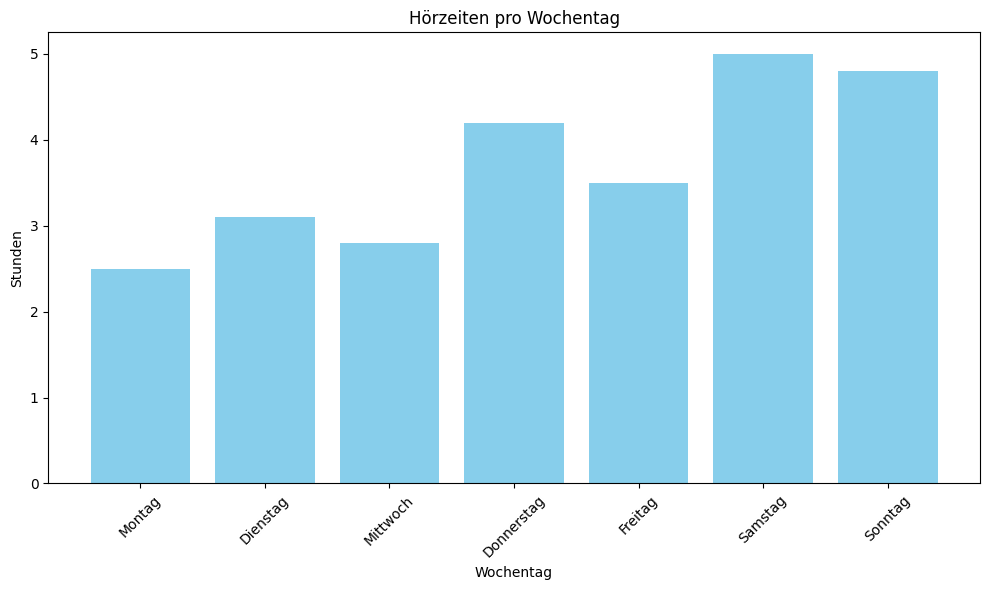

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

daten = pd.DataFrame({
    'Wochentag': ['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag'],
    'Hörzeit_Stunden': [2.5, 3.1, 2.8, 4.2, 3.5, 5.0, 4.8]
})

plt.figure(figsize=(10, 6))
plt.bar(daten['Wochentag'], daten['Hörzeit_Stunden'], color='skyblue')
plt.title('Hörzeiten pro Wochentag')
plt.xlabel('Wochentag')
plt.ylabel('Stunden')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\faraz\AppData\Local\Temp\ipykernel_24064\2083775488.py:30: UserWarning:

Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.

c:\Users\faraz\Work\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.



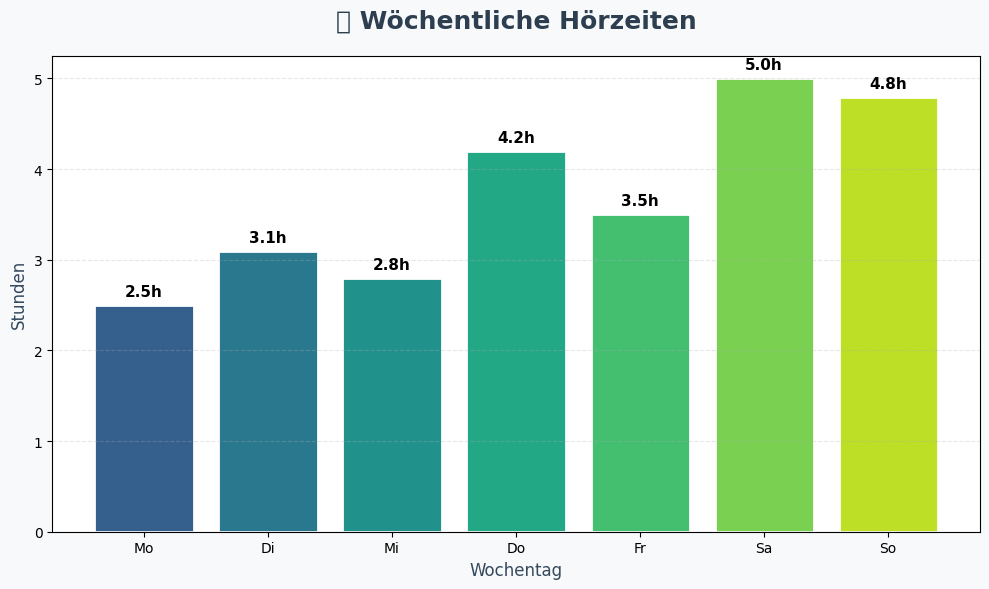

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Daten
tage = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']
stunden = [2.5, 3.1, 2.8, 4.2, 3.5, 5.0, 4.8]

# Diagramm erstellen
plt.figure(figsize=(10, 6), facecolor='#f8f9fa')

# Farbverlauf für Balken
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(tage)))

bars = plt.bar(tage, stunden, color=colors, edgecolor='white', linewidth=2)

# Design verbessern
plt.title('🎧 Wöchentliche Hörzeiten', fontsize=18, fontweight='bold', pad=20, color='#2c3e50')
plt.xlabel('Wochentag', fontsize=12, color='#34495e')
plt.ylabel('Stunden', fontsize=12, color='#34495e')

# Gitter
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Werte auf Balken
for bar, wert in zip(bars, stunden):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f'{wert}h', ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

C:\Users\faraz\AppData\Local\Temp\ipykernel_24064\1319354413.py:24: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.

c:\Users\faraz\Work\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



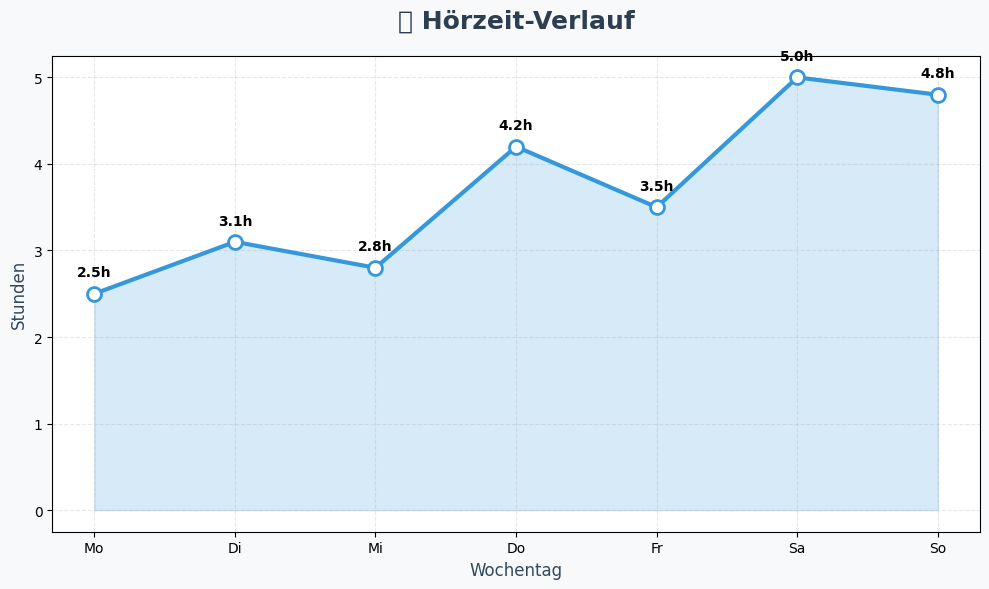

In [54]:
plt.figure(figsize=(10, 6), facecolor='#f8f9fa')

# Linie mit Schatten
plt.plot(tage, stunden, 
         marker='o',
         markersize=10,
         markerfacecolor='white',
         markeredgewidth=2,
         linewidth=3,
         color='#3498db')

# Unter der Linie füllen
plt.fill_between(tage, stunden, alpha=0.2, color='#3498db')

plt.title('📈 Hörzeit-Verlauf', fontsize=18, fontweight='bold', pad=20, color='#2c3e50')
plt.xlabel('Wochentag', fontsize=12, color='#34495e')
plt.ylabel('Stunden', fontsize=12, color='#34495e')
plt.grid(alpha=0.3, linestyle='--')

# Punkte beschriften
for x, y in zip(tage, stunden):
    plt.text(x, y + 0.2, f'{y}h', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

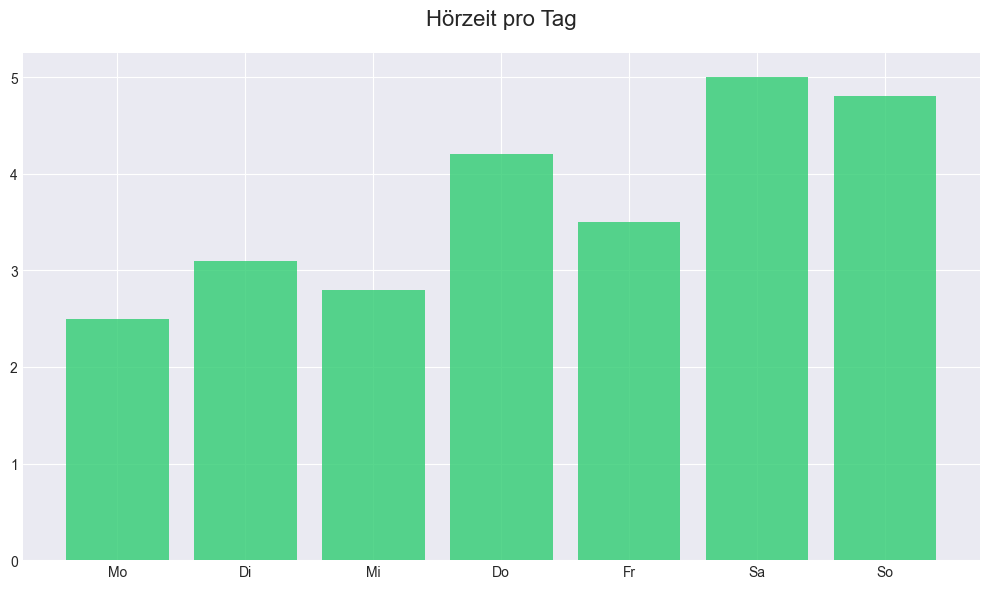

In [55]:
# Modernes, sauberes Design
plt.figure(figsize=(10, 6))

# Dunkles Theme
plt.style.use('seaborn-v0_8-darkgrid')

bars = plt.bar(tage, stunden, color='#2ecc71', alpha=0.8)

# Sehr subtiles Design
plt.title('Hörzeit pro Tag', fontsize=16, fontweight='light', pad=20)
plt.xlabel('')
plt.ylabel('')

# Achsen verstecken
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()